## Actividad de  Python

- Datos de covid en España -> buscando patrones
                                                                                INSO4Z_2021-2022_actividad_python
                                                                                CUATRIMESTRE 2º
                                                                          
                                                                            
NOMBRE: ______________________________________________________________________________________

APELLIDOS: _____________________________________________________________________________________


GRADO: Grado en Ingeniería del Software CURSO / GRUPO: 4º
ASIGNATURA: Visualización de datos 


## Datos de covid por provincias

fuente: https://cnecovid.isciii.es/covid19/resources/casos_hosp_uci_def_sexo_edad_provres.csv

Descripción de los metadatos https://cnecovid.isciii.es/covid19/resources/metadata_diag_ccaa_decl_prov_edad_sexo.pdf
  
(datos para las gráficas) 

Datos:
  
- Provincia_iso (1 o dos letras)
- Sexo (H/M)
- grupo edad (de 10 en 10 años)
- Fecha (yyyy-mm-dd)
- num_casos 
- num_hosp 
- num_uci 
- nun_def

Fechas de las olas
 
``` 
olas = ["2020-04-01","2020-08-02","2020-12-01","2021-04-01","2021-07-01","2021-12-01"]

name_olas = ["1ª ola","2ª ola","3ª ola","4ª ola","5ª ola","6ª ola"]
``` 
Datos para visualización

- Abreviaturas de nombres de provincia y nombres largos https://raw.githubusercontent.com/montera34/escovid19data/master/data/original/abreviaturas_provincias.csv




In [154]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.text import Text

In [155]:
# parámetros de estilo
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.titlepad'] = 20 



### Lectura de datos

In [156]:

covid_isciii_df = pd.read_csv('https://cnecovid.isciii.es/covid19/resources/casos_hosp_uci_def_sexo_edad_provres.csv',
                    sep = ',',
                    thousands='.', 
                    decimal = ',',
                    na_values=["NC"])
covid_isciii_df['fecha'] = pd.to_datetime(covid_isciii_df['fecha'])
covid_isciii_df.dtypes
covid_isciii_df['provincia_iso'].fillna('NV', inplace = True) #problema de Navarra, lo toma por nulo
print (covid_isciii_df)
print (covid_isciii_df.iloc[482])
print (len (covid_isciii_df))


        provincia_iso sexo grupo_edad      fecha  num_casos  num_hosp  \
0                   A    H        0-9 2020-01-01          0         0   
1                   A    H      10-19 2020-01-01          0         0   
2                   A    H      20-29 2020-01-01          0         0   
3                   A    H      30-39 2020-01-01          0         0   
4                   A    H      40-49 2020-01-01          0         0   
...               ...  ...        ...        ...        ...       ...   
1302205            ZA  NaN      50-59 2022-03-29          0         0   
1302206            ZA  NaN      60-69 2022-03-29          0         0   
1302207            ZA  NaN      70-79 2022-03-29          0         0   
1302208            ZA  NaN        80+ 2022-03-29          0         0   
1302209            ZA  NaN        NaN 2022-03-29          0         0   

         num_uci  num_def  
0              0        0  
1              0        0  
2              0        0  
3          

### Preparar datos para la visualización



#### Añadir los nombres largos de provincias para mayor claridad

  Recursos en https://raw.githubusercontent.com/montera34/escovid19data/master/data/original/abreviaturas_provincias.csv

In [157]:
# Incorporación del nombre largo de la provincia

provincias_abreviatura_df = pd.read_csv('https://raw.githubusercontent.com/montera34/escovid19data/master/data/original/abreviaturas_provincias.csv',
                    sep = ',',
                    thousands='.', 
                    decimal = ',',
                    na_values=["NC"])
print (provincias_abreviatura_df)
covid_provincias_df = covid_isciii_df.set_index('provincia_iso').join(provincias_abreviatura_df.set_index('abreviatura'))
print (covid_provincias_df)
print (len (covid_provincias_df))


    codigo               provincia abreviatura
0        1             Araba/Álava          VI
1        2                Albacete          AB
2        3        Alicante/Alacant           A
3        4                 Almería          AL
4        5                   Ávila          AV
5        6                 Badajoz          BA
6        7          Balears, Illes          PM
7        8               Barcelona           B
8        9                  Burgos          BU
9       10                 Cáceres          CC
10      11                   Cádiz          CA
11      12      Castellón/Castelló          CS
12      13             Ciudad Real          CR
13      14                 Córdoba          CO
14      15               Coruña, A           C
15      16                  Cuenca          CU
16      17                  Girona          GI
17      18                 Granada          GR
18      19             Guadalajara          GU
19      20                Gipuzkoa          SS
20      21   

#### limpiando datos

- Filtramos los últimos cuatro días por no ser datos consolidados
- Quitamos datos nulos

In [158]:
max_fecha  = max (covid_provincias_df.fecha)
print (max_fecha)
max_fecha = max_fecha - timedelta(days=4)
print ('max fecha -4', max_fecha)
print ('row data',len (covid_provincias_df))
covid_provincias_df = covid_provincias_df [(covid_provincias_df['fecha'] < max_fecha) ]  
print ('quitar últimas fechas',len (covid_provincias_df))
covid_provincias_df.dropna(inplace = True) 
print ('quitar filas nulas', len (covid_provincias_df))


2022-03-29 00:00:00
max fecha -4 2022-03-25 00:00:00
row data 1302210
quitar últimas fechas 1294260
quitar filas nulas 776556


#### Fechas varias

Fechas del inicio de las olas

In [159]:
olas = pd.to_datetime(["2020-03-11","2020-08-02","2020-12-01","2021-04-01","2021-07-01","2021-12-01"])
print (type(olas))
olas_name = ["1ª","2ª","3ª","4ª","5ª","6ª"]

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


### Evolución de las hospitalizaciones de covid por edad

Generar dos vistas diferentes de line chart con la evolución del covid por edad mostrando las distintas olas


- Elegir un formato de fecha adecuado
- Señalar las olas

Ayuda para pintar líneas divisorias por olas

```
  for i in range (0,len(olas)):
    ax.axvline(x=olas[i], color='grey',linestyle ='--')
```

El texto de la ola corre de vuestra cuenta. Se puede usar text o annotate 

Podéis elegir entre matplotlib, pandas-matplotlib o Seaborn


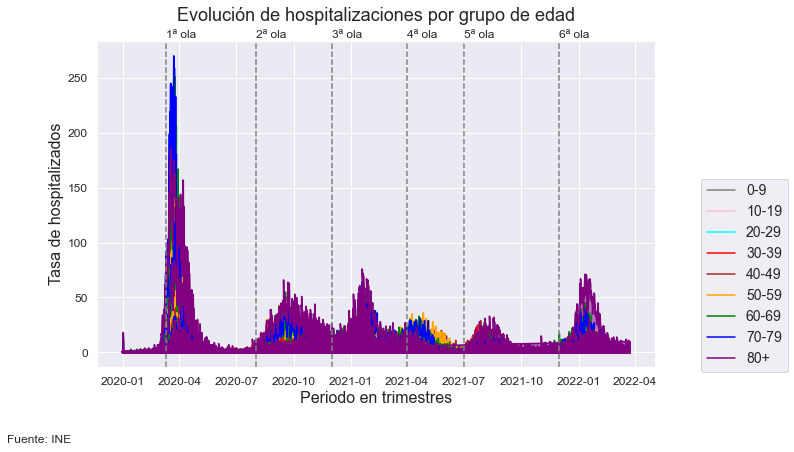

In [160]:
# Visualización 1

plt.rcParams["figure.figsize"]=[10,6]

fuente= "Fuente: INE"
grupos_edad = pd.unique(covid_provincias_df['grupo_edad']).tolist() # Obtenemos la lista para iterar
paleta_edad = {'0-9':'gray','10-19':'pink','20-29':'cyan','30-39':'red','40-49':'brown','50-59':'orange','60-69':'green','70-79':'blue','80+':'purple'} # dict para asignar color

fmt = '%.0f%%' # Formato de los ticks'

fig, ax = plt.subplots () # Creamos el contenedor y el eje
for grupo in grupos_edad: # Iteramos por género
    x = covid_provincias_df[covid_provincias_df['grupo_edad'] == grupo].fecha # Valor eje x
    y = covid_provincias_df[covid_provincias_df['grupo_edad'] == grupo].num_hosp #valor eje y
    
    color=paleta_edad[grupo] #color línea
    ax.plot(x, y, label=grupo, color=color) # Pintamos la gráfica
    ax.fill_between(x, y,  color=color,  alpha=0.5) # Pintamos la gráfica
    #ax.step(x, y, label=genero, color=color) # Pintamos la gráfica
  
for i in range (0,len(olas)):
   ax.axvline(x=olas[i], color='grey',linestyle ='--')
   ax.text(olas[i], 286, olas_name[i]+" ola", fontsize = 12, rotation = 0)
   
plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
# yticks = mtick.FormatStrFormatter(fmt) # Definimos el formato % al eje y 
# ax.yaxis.set_major_formatter(yticks) # Aplicamos formato % al eje y
ax.set_title("Evolución de hospitalizaciones por grupo de edad", fontsize = 18)  # Añadimos título
ax.set_xlabel('Periodo en trimestres') # Añadimos etiqueta eje x
ax.set_ylabel('Tasa de hospitalizados') # Añadimos etiqueta eje y
ax.legend()  # Añadimos leyenda por defecto.
#ax.legend(title ="Sexo", labels =["H","M"])  # Añadimos leyenda específica.
ax.legend (bbox_to_anchor = (1.25,0.6)) # Sacar la leyenda fuera de la gráfica
plt.figtext(x=0,y=-.05,s=fuente,ha='left') #añadimos el caption manualmente

plt.show()

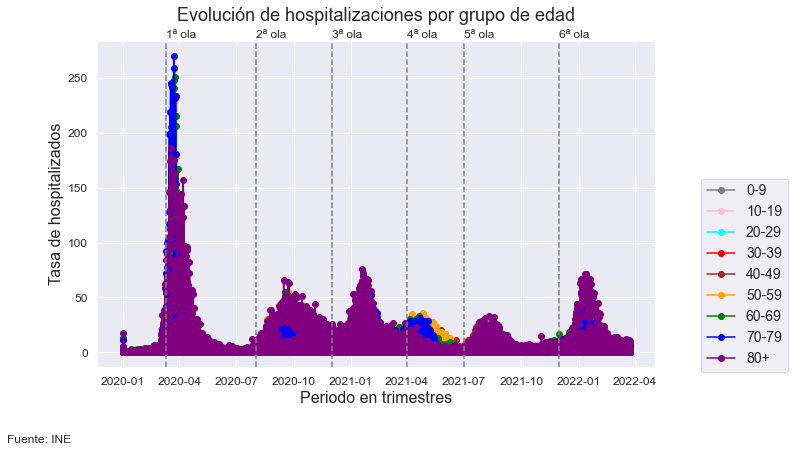

In [161]:
# Visualización 2

plt.rcParams["figure.figsize"]=[10,6]

fuente= "Fuente: INE"
grupos_edad = pd.unique(covid_provincias_df['grupo_edad']).tolist() # Obtenemos la lista para iterar
paleta_edad = {'0-9':'gray','10-19':'pink','20-29':'cyan','30-39':'red','40-49':'brown','50-59':'orange','60-69':'green','70-79':'blue','80+':'purple'} # dict para asignar color

fmt = '%.0f%%' # Formato de los ticks'

fig, ax = plt.subplots () # Creamos el contenedor y el eje
for grupo in grupos_edad: # Iteramos por género
    x = covid_provincias_df[covid_provincias_df['grupo_edad'] == grupo].fecha # Valor eje x
    y = covid_provincias_df[covid_provincias_df['grupo_edad'] == grupo].num_hosp #valor eje y
    
    color=paleta_edad[grupo] #color línea
    ax.plot(x, y, label=grupo, color=color,linestyle = '-', marker = 'o') # Pintamos la gráfica
    ax.fill_between(x, y,  color=color,  alpha=0.5) # Pintamos la gráfica
    #ax.step(x, y, label=genero, color=color) # Pintamos la gráfica
  
for i in range (0,len(olas)):
   ax.axvline(x=olas[i], color='grey',linestyle ='--')
   ax.text(olas[i], 286, olas_name[i]+" ola", fontsize = 12, rotation = 0)
   
plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
# yticks = mtick.FormatStrFormatter(fmt) # Definimos el formato % al eje y 
# ax.yaxis.set_major_formatter(yticks) # Aplicamos formato % al eje y
ax.set_title("Evolución de hospitalizaciones por grupo de edad", fontsize = 18)  # Añadimos título
ax.set_xlabel('Periodo en trimestres') # Añadimos etiqueta eje x
ax.set_ylabel('Tasa de hospitalizados') # Añadimos etiqueta eje y
ax.legend()  # Añadimos leyenda por defecto.
#ax.legend(title ="Sexo", labels =["H","M"])  # Añadimos leyenda específica.
ax.legend (bbox_to_anchor = (1.25,0.6)) # Sacar la leyenda fuera de la gráfica
plt.figtext(x=0,y=-.05,s=fuente,ha='left') #añadimos el caption manualmente

plt.show()

### Mapa de calor de hospitalizados por edad

- En el eje X aparecerán los grupos de edad  y en el eje y el tiempo. Es a la inversa del heatmap que hicimos en R. Python es menos flexible que R y el para el heatmap utiliza valores discretos para los ejes (aunque el dato del tiempo está en formato fecha). En este hilo de stackoverflow podeis ver el problema y las soluciones que proponen  https://stackoverflow.com/questions/40925458/date-axis-in-heatmap-seabornen. A mi me ha funcionado la solución 2, una clase para pintar los ejes indicando la frecuencia del tiempo. Usando la función 

``` 
     set_date_ticks(ax, fecha_minima, fecha_máxima, freq='M', date_format='%b-%y')
``` 
- No pondremos textos porque son muy grandes los números y muy pequeñas las casillas



In [162]:
# Clase para formatar el eje Y del heatmap
from collections.abc import Iterable
from sklearn import linear_model

class AxTransformer:
    def __init__(self, datetime_vals=False):
        self.datetime_vals = datetime_vals
        self.lr = linear_model.LinearRegression()
        
        return
    
    def process_tick_vals(self, tick_vals):
        if not isinstance(tick_vals, Iterable) or isinstance(tick_vals, str):
            tick_vals = [tick_vals]
            
        if self.datetime_vals == True:
            tick_vals = pd.to_datetime(tick_vals).view('int64')
            
        tick_vals = np.array(tick_vals)
            
        return tick_vals
    
    def fit(self, ax, axis='x'):
        axis = getattr(ax, f'get_{axis}axis')()
        
        tick_locs = axis.get_ticklocs()
        tick_vals = self.process_tick_vals([label._text for label in axis.get_ticklabels()])
        
        self.lr.fit(tick_vals.reshape(-1, 1), tick_locs)
        
        return
    
    def transform(self, tick_vals):        
        tick_vals = self.process_tick_vals(tick_vals)
        tick_locs = self.lr.predict(np.array(tick_vals).reshape(-1, 1))
        
        return tick_locs
    
def set_date_ticks(ax, start_date, end_date, axis='y', date_format='%Y-%m-%d', **date_range_kwargs):
    dt_rng = pd.date_range(start_date, end_date, **date_range_kwargs)

    ax_transformer = AxTransformer(datetime_vals=True)
    ax_transformer.fit(ax, axis=axis)
    
    getattr(ax, f'set_{axis}ticks')(ax_transformer.transform(dt_rng))
    getattr(ax, f'set_{axis}ticklabels')(dt_rng.strftime(date_format))

    ax.tick_params(axis=axis, which='both', bottom=True, top=False, labelbottom=True)
    
    return ax

In [163]:
covid_provincias_df2 = covid_provincias_df[["fecha", "grupo_edad", "num_hosp", "sexo"]]
covid_provincias_df2 = covid_provincias_df2.groupby(["fecha", "grupo_edad", "sexo"])["num_hosp"].sum().reset_index(name="num_hosp")

In [164]:
covid_provincias_df2

,fecha,grupo_edad,sexo,num_hosp
0,2020-01-01,0-9,H,0
1,2020-01-01,0-9,M,0
2,2020-01-01,10-19,H,0
3,2020-01-01,10-19,M,0
4,2020-01-01,20-29,H,0
...,...,...,...,...
14647,2022-03-24,60-69,M,16
14648,2022-03-24,70-79,H,26
14649,2022-03-24,70-79,M,28
14650,2022-03-24,80+,H,51


In [165]:
covid_provincias_df3 = covid_provincias_df2.groupby(["fecha", "grupo_edad"])["num_hosp"].sum().reset_index(name="num_hosp")
covid_provincias_df3

,fecha,grupo_edad,num_hosp
0,2020-01-01,0-9,0
1,2020-01-01,10-19,0
2,2020-01-01,20-29,0
3,2020-01-01,30-39,1
4,2020-01-01,40-49,0
...,...,...,...
7321,2022-03-24,40-49,21
7322,2022-03-24,50-59,15
7323,2022-03-24,60-69,34
7324,2022-03-24,70-79,54


In [166]:
covid_provincias_df3 = covid_provincias_df3.pivot("fecha", "grupo_edad", "num_hosp")

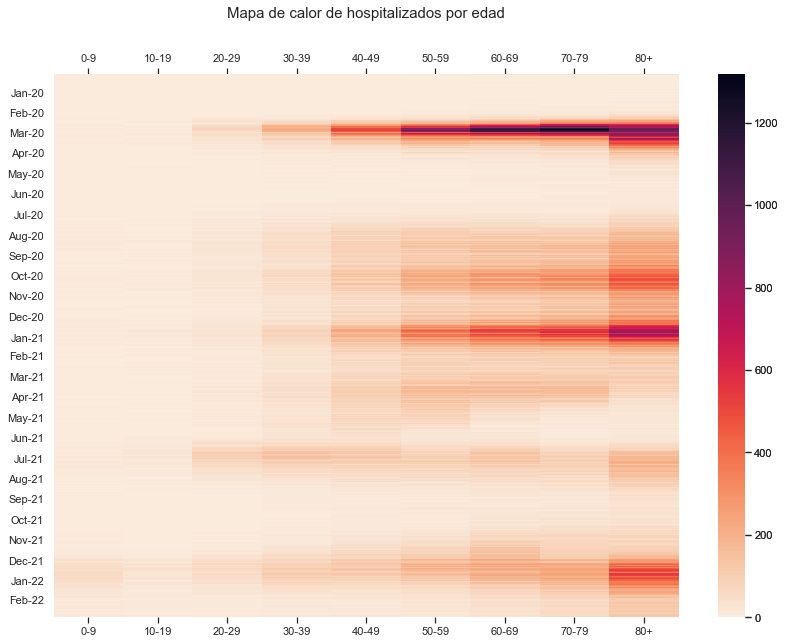

In [167]:
# mapa de calor

sns.set_theme()

plt.rcParams["figure.figsize"]=[14,10]
fig, ax = plt.subplots () # Creamos el contenedor y el eje
ax1 = ax.twiny() #Para crear un doble eje
ax = sns.heatmap(covid_provincias_df3, annot = False, cmap='rocket_r', ax=ax)
ax.set_xlabel("")
ax.set_ylabel("")
ax = sns.heatmap(covid_provincias_df3, annot = False, cmap='rocket_r', ax=ax1)  
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("Mapa de calor de hospitalizados por edad\n",size =15)
ax = set_date_ticks(ax, '2020-01-01', '2022-03-10', freq='M', date_format='%b-%y')

### Variación de la hospitalización  entre el pico de la primera ola y el de la sexta por edad


Generar dos vistas diferentes

- Pico primera ola: 2020-03-24
- Pico sexta ola: 2022-01-13


In [168]:
covid_provincias_df4 = covid_provincias_df2 [(covid_provincias_df2['fecha'] == olas[0])
                    |(covid_provincias_df2['fecha'] == olas[5])]
covid_provincias_df4.sort_values('num_hosp', ascending=False, inplace=True) # si ponemos directamente '

C:\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [169]:
pd.unique(covid_provincias_df4["fecha"].dt.year)

array([2020, 2021], dtype=int64)

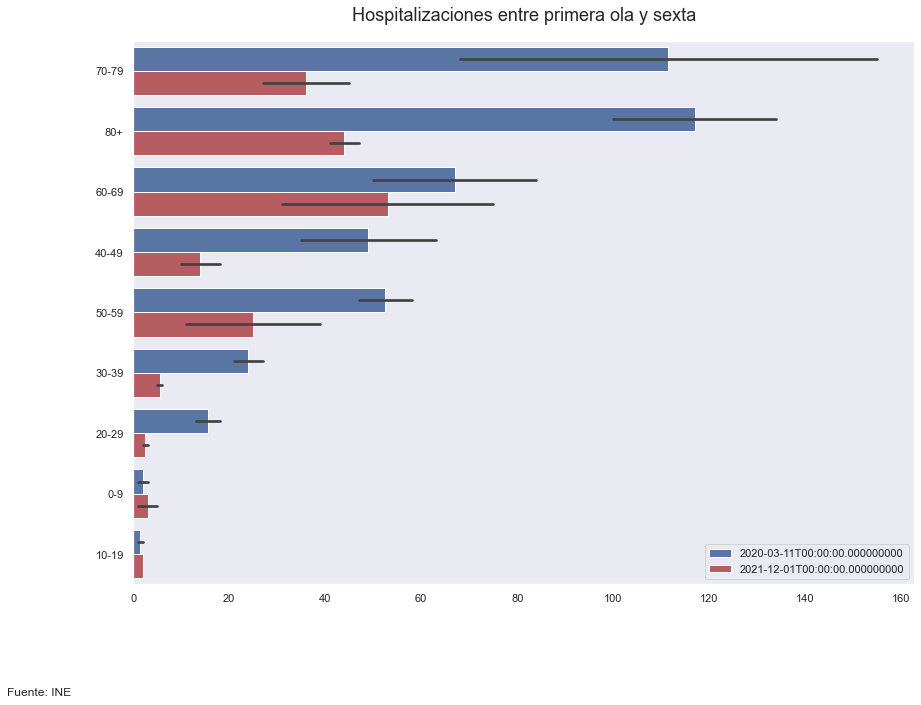

In [170]:
# Visualización 1

ax = sns.barplot(data = covid_provincias_df4, x="num_hosp", y="grupo_edad", hue = "fecha", dodge = True,
                 palette = ['b','r'])

                 #ejes

ax.set_xlabel('Nº Hospitalizaciones',size=18)
ax.set_ylabel('')
ax.set_xlabel('')
ax.legend()  # Añadimos leyenda.
# ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_title('Hospitalizaciones entre primera ola y sexta',size=18)
plt.figtext(x=0,y=-.03,s=fuente,ha='left')	
ax.grid(False)

plt.show()

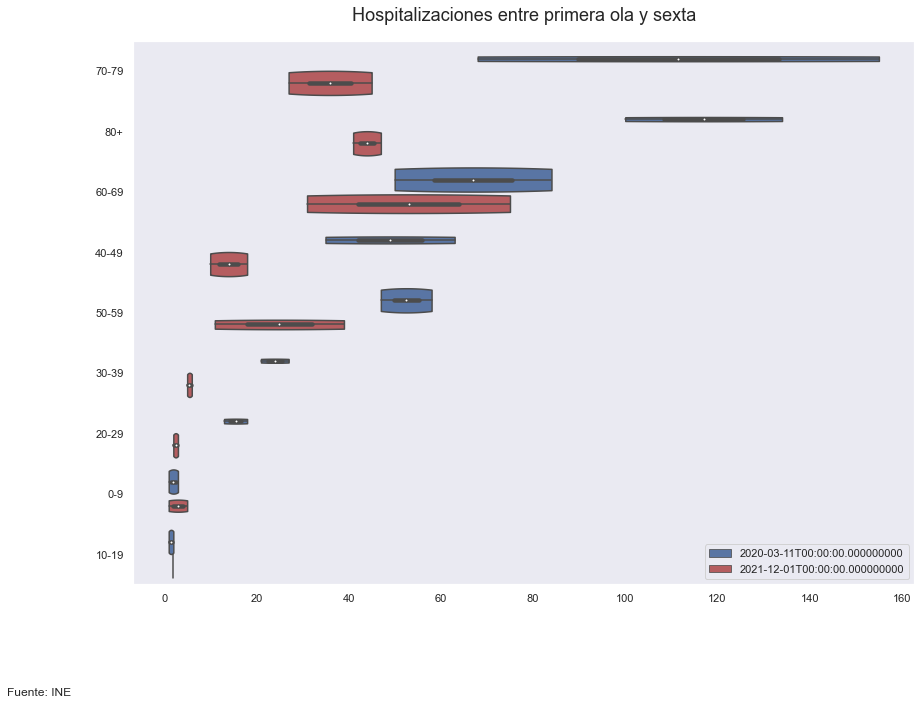

In [171]:
# Visualización 2
ax = sns.violinplot(data = covid_provincias_df4, x="num_hosp", y="grupo_edad", hue = "fecha", dodge = True,
                 palette = ['b','r'], cut=0)
                 
ax.set_xlabel('Nº Hospitalizaciones',size=18)
ax.set_ylabel('')
ax.set_xlabel('')
ax.legend()  # Añadimos leyenda.
# ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_title('Hospitalizaciones entre primera ola y sexta',size=18)
plt.figtext(x=0,y=-.03,s=fuente,ha='left')	
ax.grid(False)

plt.show()


### Distribución de la hospitalización por grupo de edad y sexo

#### visualización 1


- Dibujar un boxplot con la distribución de la hospitalización por grupo de edad y sexo


In [172]:
covid_provincias_df5 = covid_provincias_df

In [173]:
covid_provincias_df5 = covid_provincias_df5[["sexo", "grupo_edad", "fecha", "num_hosp"]]
covid_provincias_df5["year"] = pd.to_numeric(covid_provincias_df["fecha"].dt.year)
covid_provincias_df5 = covid_provincias_df5.groupby(["year", "grupo_edad", "sexo"])["num_hosp"].sum().reset_index(name="num_hosp")

C:\Users\JOAQUN~1\AppData\Local\Temp/ipykernel_24928/1461693899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_provincias_df5["year"] = pd.to_numeric(covid_provincias_df["fecha"].dt.year)


Text(0.5, 0, '')

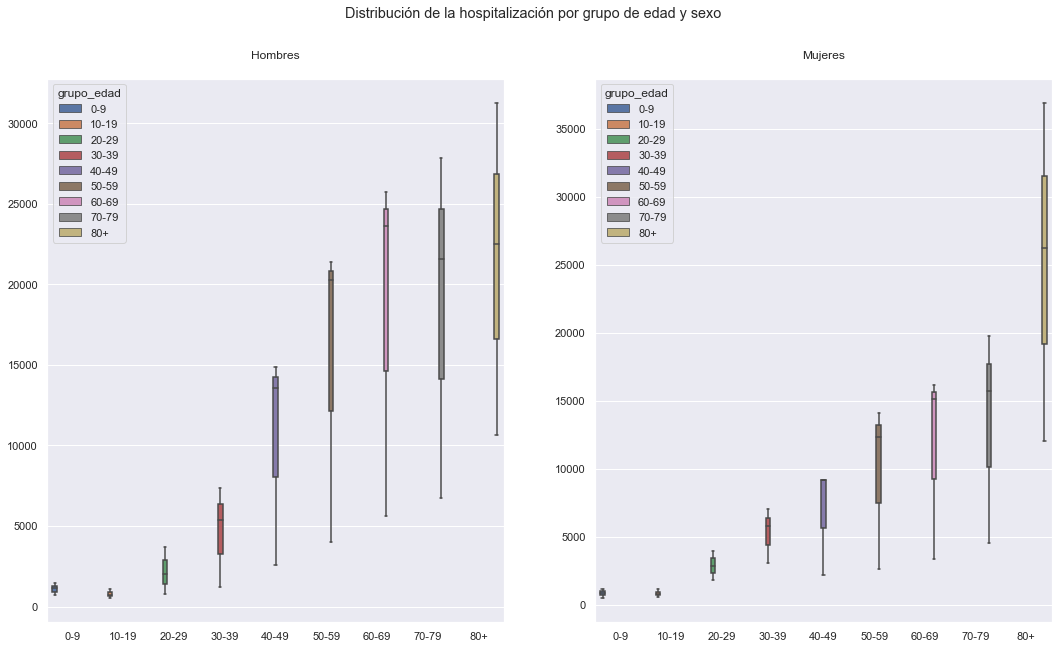

In [174]:
#Boxplot

fig, axes = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Distribución de la hospitalización por grupo de edad y sexo')

covid_provincias_hombres = covid_provincias_df5[covid_provincias_df5["sexo"] == "H"]
covid_provincias_mujeres = covid_provincias_df5[covid_provincias_df5["sexo"] == "M"]

axes[0].set_title('Hombres')
ax = sns.boxplot(ax=axes[0], data=covid_provincias_hombres, x='grupo_edad', y='num_hosp', hue = "grupo_edad")
ax.set_ylabel('')
ax.set_xlabel('')
axes[1].set_title('Mujeres')
ax = sns.boxplot(ax=axes[1], data=covid_provincias_mujeres, x='grupo_edad', y='num_hosp', hue = "grupo_edad")
ax.set_ylabel('')
ax.set_xlabel('')


### Pirámide de edad de hospitalizaciones por sexo

- Dibujar una pirámide de edad de hospitalizaciones  y colorearla por sexo


In [175]:
# covid_provincias_hombres["num_hosp"] = covid_provincias_hombres["num_hosp"] * -1
covid_provincias_df5.loc[covid_provincias_df5['sexo'] == "H", 'num_hosp'] *= -1

Text(0, 0.5, '')

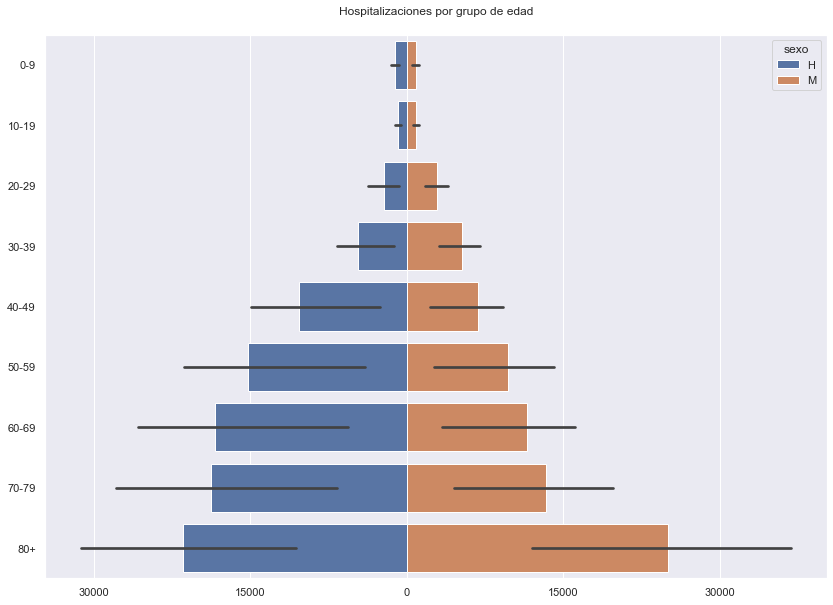

In [176]:
# plt.rcParams["figure.figsize"]=[6,8]

# ax = sns.barplot(data=covid_provincias_hombres, x = 'num_hosp', y= 'grupo_edad', color='#B385DA')
# ax = sns.barplot(data=covid_provincias_mujeres, x = 'num_hosp', y= 'grupo_edad', color='#1CB3EC')

ax = sns.barplot(data=covid_provincias_df5, x='num_hosp',y='grupo_edad',
            hue='sexo',orient='horizontal', 
            dodge=False)
label_format = '{:,.0f}'
#ejes
ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ticks_loc = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
# print(label_format.format(ticks_loc[0]))
ax.set_xticklabels([int(label_format.format(x).replace(',',''))*-1 if int(label_format.format(x).replace(',',''))<0 else int(label_format.format(x).replace(',','')) for x in ticks_loc])
ax.set_title("Hospitalizaciones por grupo de edad")
ax.set_xlabel('')
ax.set_ylabel('')

# # ax.tick_params(axis='both', which='major', labelsize=12)

# ax.set_title('Tasa de paro actual por género',size=18)
# plt.figtext(x=0,y=-.05,s=fuente,ha='left')	
# ax.grid(False)
# # Poner etiqetas a las barras
# plt.show()


### Relación entre hospitalizaciones y fallecimientos



#### Visualización 1 

- Hacer una gráfica de doble escala. Un eje para los hospitalizados y otro para los fallecidos 

-  Marcar las olas

In [177]:
hospitalizaciones = covid_provincias_df[["fecha", "num_hosp"]]
hospitalizaciones = hospitalizaciones.groupby(["fecha"])["num_hosp"].sum().reset_index(name="num_hosp")
fallecimientos = covid_provincias_df[["fecha", "num_def"]]
fallecimientos = fallecimientos.groupby(["fecha"])["num_def"].sum().reset_index(name="num_def")
combined = pd.merge(hospitalizaciones, fallecimientos, on="fecha")

Text(0.5, 1.0, 'Evolución de hospitalizaciones y defunciones')

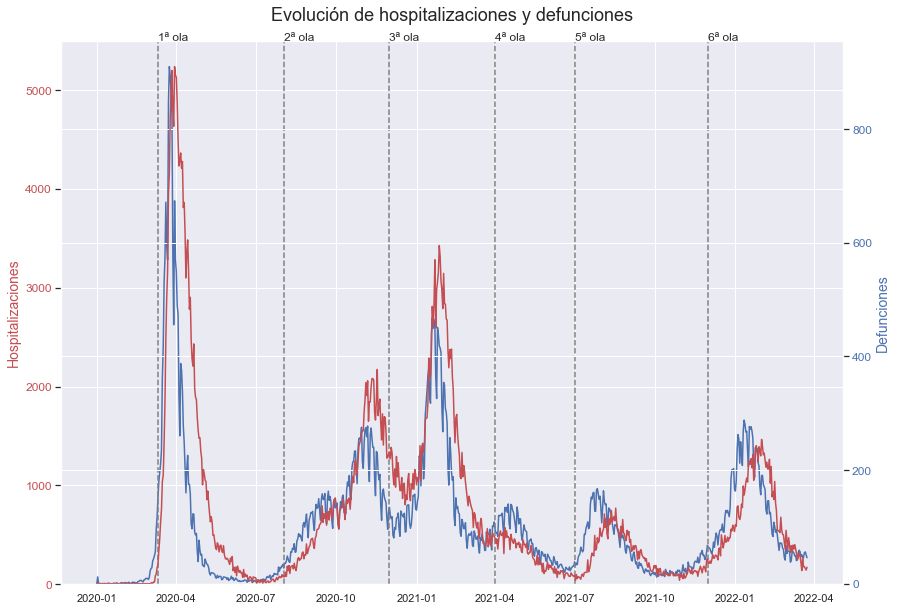

In [178]:
# Eje doble escala

sns.set_theme()

ax1 = sns.lineplot(data=combined, x = "fecha", y = "num_hosp",  color="b")
ax2 = plt.twinx()
ax2 = sns.lineplot(data=combined, x = "fecha", y = "num_def", color="r", ax=ax2)

# Completamos detalles con matplotlib
ax1.set_ylabel ('Hospitalizaciones', fontsize=14, color='r')
ax1.yaxis.set_tick_params(labelsize=12,labelcolor='r')
ax1.grid (True) # Añado grid

for i in range (0,len(olas)):
   ax1.axvline(x=olas[i], color='grey',linestyle ='--')
   ax1.text(olas[i], 5500, olas_name[i]+" ola", fontsize = 12, rotation = 0)

ax2.set_ylabel ('Defunciones' , fontsize=14, color='b')
ax2.yaxis.set_tick_params(labelsize=12,labelcolor='b')
ax1.set_xlabel("")
ax1.set_ylim(ymin=-1)
ax2.set_ylim(ymin=-1)
plt.title("Evolución de hospitalizaciones y defunciones", fontsize=18)


#### Visualización 2

- Hacer un scaterplot conectado con los hospitalizados (eje x) y los fallecidos (eje y) para hombres y mujeres (usar subplots)
- No incluir etiquetas

In [179]:
hospitalizaciones = covid_provincias_df[["fecha", "num_hosp", "sexo"]]
hospitalizaciones = hospitalizaciones.groupby(["fecha", "sexo"])["num_hosp"].sum().reset_index(name="num_hosp")
fallecimientos = covid_provincias_df[["fecha", "num_def", "sexo"]]
fallecimientos = fallecimientos.groupby(["fecha", "sexo"])["num_def"].sum().reset_index(name="num_def")

In [180]:
hospitalizaciones_h = hospitalizaciones[hospitalizaciones["sexo"] == "H"]
hospitalizaciones_h = hospitalizaciones_h[["fecha", "num_hosp"]]
hospitalizaciones_m = hospitalizaciones[hospitalizaciones["sexo"] == "M"]
hospitalizaciones_m = hospitalizaciones_m[["fecha", "num_hosp"]]

fallecimientos_h = fallecimientos[fallecimientos["sexo"] == "H"]
fallecimientos_h = fallecimientos_h[["fecha", "num_def"]]
fallecimientos_m = fallecimientos[fallecimientos["sexo"] == "M"]
fallecimientos_m = fallecimientos_m[["fecha", "num_def"]]

In [181]:
hospitalizaciones_h.reset_index(inplace=True)
hospitalizaciones_m.reset_index(inplace=True)
fallecimientos_h.reset_index(inplace=True)
fallecimientos_m.reset_index(inplace=True)

In [182]:
hospitalizaciones_m.index

RangeIndex(start=0, stop=814, step=1)

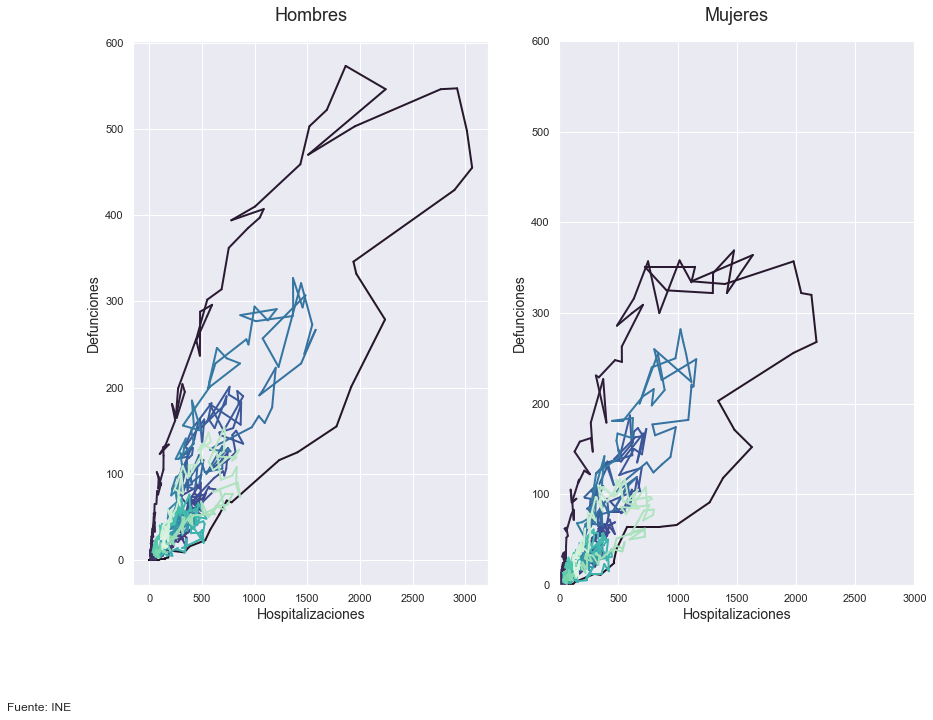

In [183]:
# scatterplot conectado 
fig, (ax1, ax2) = plt.subplots(1, 2)   #creo dos ejes 
sns.set_style("ticks")
plt.rcParams["figure.figsize"]=[10,6]
colores = sns.color_palette('mako', len(hospitalizaciones_h.index))
colores2 = sns.color_palette('mako', len(hospitalizaciones_m.index))

ax2.set_ylim([0, 600])
ax2.set_xlim([0, 3000])

ax1.set_xlabel('Hospitalizaciones', fontsize = 14) # Añadimos etiqueta eje x
ax2.set_xlabel('Hospitalizaciones', fontsize = 14) # Añadimos etiqueta eje x
ax1.set_ylabel('Defunciones', fontsize = 14) # Añadimos etiqueta eje y
ax2.set_ylabel('Defunciones', fontsize = 14) # Añadimos etiqueta eje y
ax1.set_title("Hombres",fontsize =18)  # Añadimos título
ax2.set_title("Mujeres",fontsize =18)  # Añadimos título

for i in hospitalizaciones_h.index:
  ax1.plot(hospitalizaciones_h.loc[i:i+1,'num_hosp'],fallecimientos_h.loc[i:i+1,'num_def'],
            color=colores[i],lw=2)

for i in hospitalizaciones_m.index:
  ax2.plot(hospitalizaciones_m.loc[i:i+1,'num_hosp'],fallecimientos_m.loc[i:i+1,'num_def'],
            color=colores2[i],lw=2)

  # ax.annotate (hospitalizaciones.loc[i,'fecha'].strftime('%Y'),
  #              xy = (hospitalizaciones.loc[i,'num_hosp'],fallecimientos.loc[i,'num_def']))
plt.figtext(x=0,y=-.05,s=fuente,ha='left')	
plt.show()